# NLTK Chapter 5

## Categorizing and Tagging Words

*The html version of this chapter in the book is available [here](https://www.nltk.org/book/ch05.html "ch05").*

### 1 Using a Tagger

In [21]:
import nltk, re, pprint

In [22]:
from nltk import word_tokenize

text = word_tokenize("And now for something completely different")
print(nltk.pos_tag(text), end = '')

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]

*To get information on any tag, use `nltk.help.upenn_tagset('')`.*

In [23]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


*An example with homonyms:*

In [24]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
print(nltk.pos_tag(text), end = '')

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]

*__Your Turn:__ Many words, like __ski__ and __race__, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.*

In [25]:
text = word_tokenize("They said they would contest the results of the contest")
print(nltk.pos_tag(text), end = '')

[('They', 'PRP'), ('said', 'VBD'), ('they', 'PRP'), ('would', 'MD'), ('contest', 'VB'), ('the', 'DT'), ('results', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('contest', 'NN')]

In [26]:
text = word_tokenize("They tried to record the new world record")
print(nltk.pos_tag(text), end = '')

[('They', 'PRP'), ('tried', 'VBD'), ('to', 'TO'), ('record', 'VB'), ('the', 'DT'), ('new', 'JJ'), ('world', 'NN'), ('record', 'NN')]

The `text.similar()` method takes a word $w$, finds all contexts $w_1 w$ $w_2$, then finds all words $w'$ that appear in the same context, i.e. $w_1 w' w_2$.

In [27]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [28]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [29]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [30]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


### 2 Tagged Corpora

#### 2.1 Representing Tagged Tokens

*You can created a tagged token with `str2tuple()`:*

In [31]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [32]:
tagged_token[0]

'fly'

In [33]:
tagged_token[1]

'NN'

*Converting a string to a list of tagged tokens:*

In [34]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
print([nltk.tag.str2tuple(t) for t in sent.split()], end = '')

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]

#### 2.2 Reading Tagged Corpora

*Finding tags for NLTK corpora:*

In [35]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

*Changing tagsets:*

In [36]:
nltk.corpus.brown.tagged_words(tagset = 'universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

*More examples:*

In [37]:
print(nltk.corpus.nps_chat.tagged_words(), end = '')

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [38]:
print(nltk.corpus.conll2000.tagged_words(), end = '')

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [39]:
print(nltk.corpus.treebank.tagged_words(), end = '')

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

*Different use different corpora use different tags. Set `tagset = 'universal'` for a consistent set of tags:* 

In [40]:
print(nltk.corpus.brown.tagged_words(tagset = 'universal'), end = '')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [41]:
print(nltk.corpus.treebank.tagged_words(tagset = 'universal'), end = '')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

*Tags are also available for corpora in other languages.  When tags use non-ASCII, Python displays this in hexadecimal when printing larger structures such as a list:*

In [42]:
nltk.download('sinica_treebank')

[nltk_data] Downloading package sinica_treebank to C:\Users\Kevin
[nltk_data]     McCarville/nltk_data...
[nltk_data]   Package sinica_treebank is already up-to-date!


True

In [43]:
print(nltk.corpus.sinica_treebank.tagged_words(), end = '')

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [44]:
print(nltk.corpus.indian.tagged_words(), end = '')

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [45]:
print(nltk.corpus.mac_morpho.tagged_words(), end = '')

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [46]:
print(nltk.corpus.conll2002.tagged_words(), end = '')

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [47]:
print(nltk.corpus.cess_cat.tagged_words(), end = '')

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

*Most corpora also have a `tagged_sents()` method, which is more useful than `tagged_words()` when developing automatic taggers.*

In [48]:
print(nltk.corpus.indian.tagged_sents(), end = '')

[[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ('তোড়া', 'NNP'), ('উপজাতি', 'NN'), ('৷', 'SYM')], [('বাসস্থান-ঘরগৃহস্থালি', 'NN'), ('তোড়া', 'NNP'), ('ভাষায়', 'NN'), ('গ্রামকেও', 'NN'), ('বলে', 'VM'), ('`', 'SYM'), ('মোদ', 'NN'), ("'", 'SYM'), ('৷', 'SYM')], ...]

In [49]:
print(nltk.corpus.cess_cat.tagged_sents(), end = '')

[[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ('-Fpa-', 'Fpa'), ('TS', 'np0000o'), ('-Fpt-', 'Fpt'), ('ha', 'vaip3s0'), ('confirmat', 'vmp00sm'), ('la', 'da0fs0'), ('condemna', 'ncfs000'), ('a', 'sps00'), ('quatre', 'dn0cp0'), ('anys', 'ncmp000'), ("d'", 'sps00'), ('inhabilitació', 'ncfs000'), ('especial', 'aq0cs0'), ('i', 'cc'), ('una', 'di0fs0'), ('multa', 'ncfs000'), ('de', 'sps00'), ('3,6', 'Z'), ('milions', 'ncmp000'), ('de', 'sps00'), ('pessetes', 'Zm'), ('per', 'sps00'), ('a', 'sps00'), ('quatre', 'dn0cp0'), ('veterinaris', 'ncmp000'), ('gironins', 'aq0mp0'), (',', 'Fc'), ('per', 'sps00'), ('haver', 'van0000'), ('-se', 'p0300000'), ('beneficiat', 'vmp00sm'), ('dels', 'spcmp'), ('càrrecs', 'ncmp000'), ('públics', 'aq0mp0'), ('que', 'pr0cn000'), ('*0*', 'sn.e-SUJ'), ('desenvolupaven', 'vmii3p0'), ('i', 'cc'), ('la_seva', 'dp3fs0'), ('relació', 'ncfs000'), ('amb', 'sps00'), ('les', 'da0fp0'), ('empreses', 'ncfp000'), ('càrniques', 'aq0fp0'), ('de', 'sps00'), ('la', 'da0fs0'),

In [50]:
print(nltk.corpus.conll2002.tagged_sents(), end = '')

[[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ('Brasil', 'NC'), (')', 'Fpt'), (',', 'Fc'), ('23', 'Z'), ('may', 'NC'), ('(', 'Fpa'), ('EFECOM', 'NP'), (')', 'Fpt'), ('.', 'Fp')], [('-', 'Fg')], ...]

#### 2.3 A Universal Part-of-Speech Target

| Tag  | Meaning             | English Examples                       |
|------|---------------------|----------------------------------------|
| ADJ  | adjective           | new, good, high, special, big, local   |
| ADP  | adposition          | on, of, at, with, by, into, under      |
| ADV  | adverb              | really, already, still, early, now     |
| CONJ | conjunction         | and, or, but, if, while, although      |
| DET  | determiner, article | the, a, some, most, every, no, which   |
| NOUN | noun                | year, home, costs, time, Africa        |
| NUM  | numeral             | twenty-four, fourth, 1991, 14:24       |
| PRT  | particle            | at, on, out, over per, that, up, with  |
| PRON | pronoun             | he, their, her, its, my, I, us         |
| VERB | verb                | is, say, told, given, playing, would   |
| .    | punctuation marks   | . , ; !                                |
| X    | other               | ersatz, esprit, dunno, gr8, univeristy |

*Finding most common tags in the news category of the Brown corpus:*

In [51]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories = "news", tagset = "universal")
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print(tag_fd.most_common(), end = '')

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]

__Your Turn:__ Plot the above frequency distribution using `tag_fd.plot(cumulative=True)`. What percentage of words are tagged using the first five tags of the above list?

In [52]:
%matplotlib inline

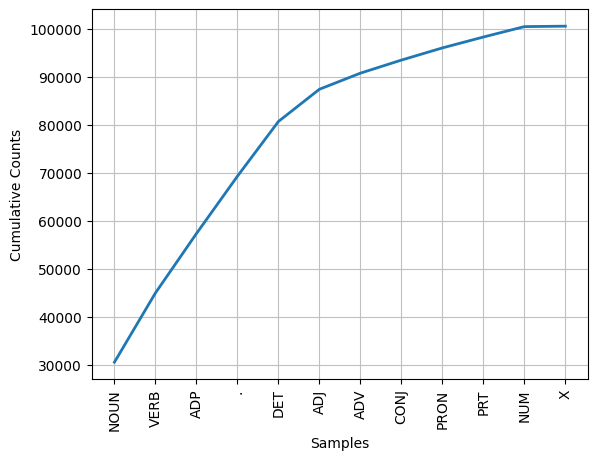

In [53]:
tag_fd.plot(cumulative = True);

*Nouns and verbs make up nearly half of the tags.*

*We can use the `nltk.app.concordance()` method to search for any combination of words and POS tags.  Calling the method opens up the app in a new window, so I'm not going to leave the call in this notebook.*

#### 2.4 Nouns

*Using tags and `FreqDist` to find the most common POS before nouns:*

In [54]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
print([tag for (tag, _) in fdist.most_common()], end = '')

['NOUN', 'DET', 'ADJ', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']

#### 2.5 Verbs

*Finding the most common verbs in a corpus:*

In [55]:
wsj = nltk.corpus.treebank.tagged_words(tagset = 'universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common(200) if wt[1] == 'VERB'], end = '')

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may', 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get']

*Using a `ConditionalFreqDist` to see which tags are most common for homonyms:*

In [56]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [57]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

*Finding the most likely words for a given tag:*

In [58]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN'])[:30], end = '')

['been', 'expected', 'made', 'compared', 'based', 'used', 'priced', 'sold', 'named', 'designed', 'held', 'fined', 'taken', 'paid', 'traded', 'increased', 'said', 'filed', 'reached', 'called', 'scheduled', 'disclosed', 'reported', 'proposed', 'estimated', 'set', 'known', 'built', 'approved', 'given']

*Finding words that were both `VBD` (past tense) and `VBN` (past participle).  Also looking at some surrounding text:*

In [77]:
print([w for w in cfd1.conditions() if 'VERB' in cfd1[w] and 'ADJ' in cfd1[w]][:20], end = '')

['used', 'even', 'brief', 'total', 'open', 'top', 'yielding', 'resigned', 'complete', 'like', 'free', 'last', 'related', 'troubled', 'complicated', 'underlying', 'record', 'working', 'close', 'direct']

In [60]:
idx1 = wsj.index(('kicked', 'VBD'))
print(wsj[idx1 - 4:idx1 + 1], end = '')

[('While', 'IN'), ('program', 'NN'), ('trades', 'NNS'), ('swiftly', 'RB'), ('kicked', 'VBD')]

In [72]:
idx2 = wsj.index(('kicked', 'VBN'))
print(wsj[idx2 - 4:idx2 + 1], end = '')

[('head', 'NN'), ('of', 'IN'), ('state', 'NN'), ('has', 'VBZ'), ('kicked', 'VBN')]

__Your Turn:__ Given the list of past participles produced by `list(cfd2['VBN'])`, try to collect a list of all the word-tag pairs that immediately precede items in that list.

In [78]:
word_tag_pairs = nltk.bigrams(nltk.corpus.treebank.tagged_words())
verb_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'VBN']
fdist = nltk.FreqDist(verb_preceders)
print([tag for (tag, _) in fdist.most_common()], end = '')

['VBZ', 'VBD', 'RB', 'VB', 'VBP', 'NNS', ',', 'NN', 'DT', '-NONE-', 'VBN', 'CC', 'IN', 'VBG', 'JJ', '``', 'CD', 'POS', 'NNP', '.', '-LRB-', ':', 'PRP$', 'RBR', 'PRP', 'TO', 'JJS', "''", 'JJR', 'RBS', '-RRB-']

#### 2.6 Adjectives and Adverbs

*__No notes.__*

#### 2.7 Unsimplified Tags

*This is a function that finds examples of tags that start with a given prefix:*

In [79]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                   if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [80]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories = 'news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

#### 2.8 Exploring Tagged Corpora

*Words that follow 'often':*

In [81]:
brown_learned_text = brown.words(categories = 'learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')), end = '')

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']

*More instructive would be to look at what POS follow 'often':*

In [82]:
brown_lrnd_tagged = brown.tagged_words(categories = 'learned', tagset = 'universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


*Another example, here with sequences of (`"<Verb> to <Verb>"`).  I added some code to make the returned phrases print out on the same line:*

In [83]:
from nltk.corpus import brown

def process(sentence, end = ' '):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3 + ";", end = end)

In [84]:
for tagged_sent in brown.tagged_sents(categories = 'humor'):
    process(tagged_sent)

paused to get; proceeded to search; began to suspect; endeavoring to cut; wanted to know; daring to commit; given to dig; urged to attend; refused to receive; beckoned to cross; taken to keep; trying to hold; managing to get; promised to illustrate; pretending to black; wanted to remind; Resolving to get; started to start; starting to woolgather; bound to get; wanted to keep; looked to see; chosen to complement; live to hear; leaping to light; trying to prove; trying to determine; supposed to put; proceeded to neglect; care to count; shuddered to think; telephoned to announce; neglected to consider; trouble to memorize; deigned to appear; seemed to understand; try to revive; seemed to produce; returning to jump; tried to farm; going to set; turned to stare; seem to think; liked to hire; remember to telephone; like to work; like to disclose; got to put; got to run; waiting to get; need to worry; seems to think; tries to baffle; mean to reconsider; refused to make; seems to make; seems t

*Looking up ambiguous words that have three or more different tags.  Results are quite different from those in the book.*

In [85]:
brown_news_tagged = brown.tagged_words(categories = 'news', tagset = 'universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


__Your Turn:__ Open the POS concordance tool `nltk.app.concordance()` and load the complete Brown Corpus (simplified tagset). Now pick some of the above words and see how the tag of the word correlates with the context of the word. E.g. search for `near` to see all forms mixed together, `near/ADJ` to see it used as an adjective, `near N` to see just those cases where a noun follows, and so forth. For a larger set of examples, modify the supplied code so that it lists words having three distinct tags.

*As before, `nltk.app.concordance()` opens in a new window, so I won't be running this in this jupyter notebook.*

### 3   Mapping Words to Properties Using Python Dictionaries

#### 3.1 Indexing Lists vs Dictionaries

*__No notes.__*

#### 3.2 Dictionaries in Python

*We can easily create lists of the keys in a dictionary:*

In [86]:
# initializing the dictionary

pos = {}

words = ['colorless', 'ideas', 'sleep', 'furiously']
parts = ['ADJ', 'N', 'V', 'ADJ']

for w, p in zip(words, parts):
    pos[w] = p
    
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADJ'}

In [87]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [88]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [89]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [92]:
for word in sorted(pos):
    print(word + ":", pos[word])

print(list(pos.keys()), end = '')

print(list(pos.values()), end = '')

print(list(pos.items()), end = '')

for key, val in sorted(pos.items()):
    print(key + ":", val)

pos['sleep'] = 'V'
print(pos['sleep'])

pos['sleep'] = 'N'
print(pos['sleep'])

pos.update({'sleep': 'V', 'ideas': 'N'})
print(pos)

del pos['sleep']
print(pos)


colorless: ADJ
furiously: ADV
ideas: N
sleep: V
['colorless', 'ideas', 'sleep', 'furiously']['ADJ', 'N', 'V', 'ADV'][('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]colorless: ADJ
furiously: ADV
ideas: N
sleep: V
V
N
{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
{'colorless': 'ADJ', 'ideas': 'N', 'furiously': 'ADV'}


#### 3.3 Defining Dictionaries

*Different ways of creating dictionaries:*



In [90]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [91]:
pos = dict(colorless = 'ADJ', ideas = 'N', sleep = 'V', furiously = 'ADV')
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

#### 3.4 Default Dictionaries

*Normal dictionaries will throw an error if we try to call a non-existent key.  `defaultdict` doesn't have this limitation.*

In [93]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [94]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
pos['ideas']

[]

*Specifying the default value:*

In [95]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['blog']

'NOUN'

In [96]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

*Many language processing tasks do not work well with tokens that appear only once or twice.  We can use a `defaultdict` to preprocess a text to replace these hapaxes with an `UNK` token.*

In [97]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v

In [98]:
alice2 = [mapping[v] for v in alice]
print(alice2[:100], end = '')

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'UNK', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']

In [99]:
len(set(alice2))

1001

#### 3.5 Incrementally Updating a Dictionary

*Using dictionaries to count occurrences.  Here we'll count the number of tags in a corpus:*

In [100]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories = 'news', tagset = 'universal'):
    counts[tag] += 1
    
counts['NOUN']


30654

In [101]:
print(sorted(counts), end = '')

['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']

In [104]:
from operator import itemgetter

pair = ('NP', 8336)
print(pair[1])
print(itemgetter(1)(pair))


8336
8336


In [105]:
from operator import itemgetter
print(sorted(counts.items(), key = itemgetter(1), reverse = True), end = '')

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]

In [106]:
print([t for t, c in sorted(counts.items(), key = itemgetter(1), reverse = True)], end = '')

['NOUN', 'VERB', 'ADP', '.', 'DET', 'ADJ', 'ADV', 'CONJ', 'PRON', 'PRT', 'NUM', 'X']

*Another example, this time indexing words according to their last two letters:*

In [107]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

In [108]:
print(last_letters['ly'][:20], end = '')

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately', 'abdominally', 'abhorrently', 'abidingly', 'abiogenetically', 'abiologically', 'abjectly', 'ableptically', 'ably', 'abnormally', 'abominably', 'aborally', 'aboriginally', 'abortively', 'aboundingly']

In [109]:
print(last_letters['zy'][:20], end = '')

['blazy', 'bleezy', 'blowzy', 'boozy', 'breezy', 'bronzy', 'buzzy', 'Chazy', 'cozy', 'crazy', 'dazy', 'dizzy', 'dozy', 'enfrenzy', 'fezzy', 'fizzy', 'floozy', 'fozy', 'franzy', 'frenzy']

*Using similar code to make an anagrams dictionary:*

In [110]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

In [111]:
anagrams[''.join(sorted('entrail'))]

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [112]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
print(anagrams['aeilnrt'])

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']


#### 3.6 Complex Keys and Values

*Code to find possible tags for a word, given the word itself, and the tag of the previous word:*

In [113]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories = 'news', tagset = 'universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

In [114]:
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

#### 3.7 Inverting a Dictionary

*Finding a value given a key is fast, but finding a key given a value is slow:*

In [115]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

In [116]:
print([key for (key, value) in counts.items() if value == 32], end = '')

['mortal', 'Against', 'Him', 'There', 'brought', 'King', 'virtue', 'every', 'been', 'thine']

*One way of inverting a dictionary:*

In [117]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

*But the method above won't work if one key has mutliple values.  The following method will:*

In [118]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

*An even easier way to do this is with `nltk.Index()`:*

In [119]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

*A summary of commonly-used methods and idioms involving dictionaries:*

| **Example**                     | **Description**                                    |
|:--------------------------------|:---------------------------------------------------|
| `d = {}`                        | create an empty dictionary and assign it to `d`    |
| `d[key] = value`                | assign a value to a given dictionary key           |
| `d.keys()`                      | the list of keys of the dictionary                 |
| `list(d)`                       | the list of keys of the dictionary                 |
| `sorted(d)`                     | the keys of the dictionary, sorted                 |
| `key in d`                      | test whether a particular key is in the dictionary |
| `for key in d`                  | iterate over the keys of the dictionary            |
| `d.values()`                    | the list of values in the dictionary               |
| `dict([(k1,v1), (k2,v2), ...])` | create a dictionary from a list of key-value pairs |
| `d1.update(d2)`                 | add all items from `d2` to `d1`                    |
| `defaultdict(int)`              | a dictionary whose default value is zero           |

### 4 Automatic Tagging

*Loading the data:*

In [120]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')

#### 4.1 The Default Tagger

*Assigning the most likely tag to each word:*

In [121]:
tags = [tag for (word, tag) in brown.tagged_words(categories = 'news')]
nltk.FreqDist(tags).max()

'NN'

*Tagging everything with `NN`:*

In [122]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens), end = '')

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]

*This does not evaluate very well:*

In [123]:
default_tagger.evaluate(brown_tagged_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\735304995.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  default_tagger.evaluate(brown_tagged_sents)


0.13089484257215028

#### 4.2 The Regular Expression Tagger

*This uses patterns to assign tags.  The tags are processed in order, and the first match is applied:*

In [124]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds 
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.\'s$', 'NN$'),                 # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
]

In [125]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]), end = '')

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]

In [126]:
regexp_tagger.evaluate(brown_tagged_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\108676848.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(brown_tagged_sents)


0.1998329255922191

__Your Turn:__ See if you can come up with patterns to improve the performance of the above regular expression tagger. (Note that [1](https://www.nltk.org/book/ch06.html#sec-supervised-classification) describes a way to partially automate such work.)

*We can achieve some marginal gains by adding regex patterns for punctuation, likely determiners, adjectives, adverbs, and so on.  However, the gains are merely marginal, suggesting that using regexes for tagging is not particularly effective.*

In [127]:
patterns = [
    (r'.*ing$', 'VBG'),                 # gerunds 
    (r'.*ed$', 'VBD'),                  # simple past
    (r'.*es$', 'VBZ'),                  # 3rd singular present
    (r'.*ould$', 'MD'),                 # modals
    (r'.\'s$', 'NN$'),                  # possessive nouns
    (r'.*s$', 'NNS'),                   # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),   # cardinal numbers
    (r'.*ly$', 'ADV'),                  # adverbs
    (r'.*y$|.*ish$|.*ive$', 'ADJ'),     # adjectives
    (r'^th.{1,3}|^an?$', 'DET'),        # determiners/articles 
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'), # punctuation 
    (r'.*', 'NN')                       # nouns (default)
]

In [128]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]), end = '')

[('``', '.'), ('Only', 'ADV'), ('a', 'DET'), ('relative', 'ADJ'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", '.'), (',', '.'), ('the', 'DET'), ('jury', 'ADJ'), ('said', 'NN'), (',', '.'), ('``', '.'), ('considering', 'VBG'), ('the', 'DET'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'DET'), ('election', 'NN'), (',', '.'), ('the', 'DET'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'DET'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'ADJ'), ("''", '.'), ('.', '.')]

In [129]:
regexp_tagger.evaluate(brown_tagged_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\108676848.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(brown_tagged_sents)


0.23002565785548063

#### 4.3 The Lookup Tagger

*Storing the most likely tags of the 100 most frequent words:*

In [130]:
fd = nltk.FreqDist(brown.words(categories = 'news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model = likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\3791757606.py:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  baseline_tagger.evaluate(brown_tagged_sents)


0.45578495136941344

*Examining this tagger with a sample sentence:*

In [131]:
sent = brown.sents(categories = 'news')[3]
print(baseline_tagger.tag(sent), end = '')

[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', None), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', None), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', 'DT'), ('city', None), ("''", "''"), ('.', '.')]

*Since most of the words were not among the 100 most common, they now have tags of `None`.  If we use a __backoff__ tagger, instead of `None`, we could assign to these words the most likely tag, which would be `NN`:*

In [132]:
baseline_tagger = nltk.UnigramTagger(model = likely_tags,
                                     backoff = nltk.DefaultTagger('NN'))

*Here's a function that will create and evaluate lookup taggers for a variety of sizes.  The code has been updated to use matplotlib and numpy instead of pylab:*

In [133]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt, 
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

import matplotlib.pyplot as plt
import numpy as np

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    plt.plot(sizes, perfs, '-bo')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.show()
    
    

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\4236064835.py:5: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))


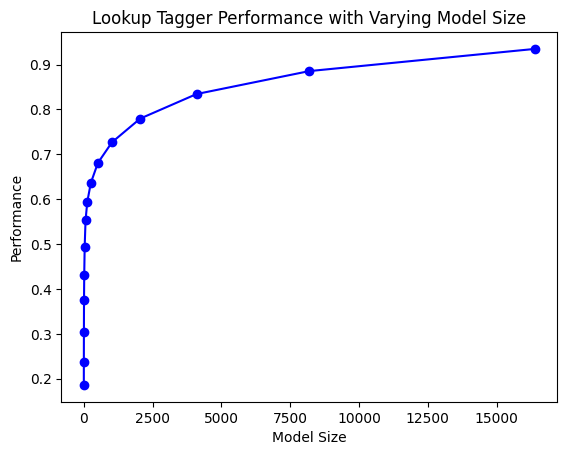

In [134]:
display()

#### 4.4 Evaluation

*__No notes.__*

### 5 N-Gram Tagging

#### 5.1 Unigram Tagging

*For unigram taggers, each token is assigned the most likely tag for that token.  E.g.:*

In [135]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
print(unigram_tagger.tag(brown_sents[2007]), end = '')

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

In [136]:
unigram_tagger.evaluate(brown_tagged_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\1449911821.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(brown_tagged_sents)


0.9349006503968017

#### 5.2 Separating the Training and Testing Data

In [137]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [138]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\1988371040.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(test_sents)


0.8121200039868434

#### 5.3 General N-Gram Tagging

*Illlustration of n-gram tagging:*

In [140]:
from IPython.display import display, Image

# display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\tag-context.png"))

*The problem with n-gram taggers is that a chain reaction occurs when one unknown word is encountered: all the following words will also be tagged as unknown, since all subsequent bigrams will have a link to this 'unknown' tag.*

In [141]:
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]), end = '')

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

In [142]:
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent), end = '')

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]

In [143]:
bigram_tagger.evaluate(test_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\705572540.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  bigram_tagger.evaluate(test_sents)


0.10206319146815508

*As __n__ gets larger, so does the chance that the data contains unseen contexts.  This is known as the __sparse data__ problem.*

#### 5.4 Combining Taggers

*Combining taggers will give higher accuracy.  E.g., We could use the bigram tagger; failing that, the unigram tagger; and failing both of those, the default tagger:*

In [144]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\559432024.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  t2.evaluate(test_sents)


0.8452108043456593

__Your Turn:__ Extend the above example by defining a `TrigramTagger` called `t3`, which backs off to `t2`.

*This actually performs slightly worse...*

In [145]:
t3 = nltk.TrigramTagger(train_sents, backoff = t2)
t3.evaluate(test_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\437773799.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  t3.evaluate(test_sents)


0.843317053722715

*We can use `cutoff` to specify how many times a tagger needs to see a training instance in order to retain it:*

In [147]:
t4 = nltk.BigramTagger(train_sents, cutoff = 2, backoff = t1)
t4.evaluate(test_sents)

C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\1778556076.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  t4.evaluate(test_sents)


0.8424200139539519

#### 5.5 Tagging Unknown Words

*We can use context to tag unknown words.  E.g., if the word preceding `UNK` is 'to', the tagger can deduce that `UNK` is probably a verb.*

#### 5.6 Storing Taggers

*We can use `pickle` to store taggers:*

In [149]:
import os

# path = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk"
# os.chdir(path)

In [150]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

*This could now be opened in a new notebook/Python instance:*

In [152]:
from pickle import load
input = open('output/t2.pkl', 'rb')
tagger = load(input)
input.close()

In [153]:
text = """The board's action shows what free enterprise
       is up against in our complex maze of regulatory laws ."""
tokens = text.split()
print(tagger.tag(tokens), end = '')

[('The', 'AT'), ("board's", 'NN$'), ('action', 'NN'), ('shows', 'NNS'), ('what', 'WDT'), ('free', 'JJ'), ('enterprise', 'NN'), ('is', 'BEZ'), ('up', 'RP'), ('against', 'IN'), ('in', 'IN'), ('our', 'PP$'), ('complex', 'JJ'), ('maze', 'NN'), ('of', 'IN'), ('regulatory', 'NN'), ('laws', 'NNS'), ('.', '.')]

#### 5.7 Performance Limitations

*Finding the performance limitations of an __n__-gram tagger.  E.g., here's the limits of a trigram tagger:*

In [154]:
cfd = nltk.ConditionalFreqDist(
            ((x[1], y[1], z[0]), z[1])
            for sent in brown_tagged_sents
            for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

*I.e., about one out of 20 trigrams is ambiguous.  If we always pick the most likely tag in these contexts, we can derive a lower bound on the performance of a trigram tagger.*

*We can also look at the __confusion matrix__:*

In [155]:
test_tags = [tag for sent in brown.sents(categories = 'editorial')
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories = 'editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [156]:
brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')
size = int(len(brown_tagged_sents) * 0.9)
print(size)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)


4160


C:\Users\Kevin McCarville\AppData\Local\Temp\ipykernel_7924\2982809924.py:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(test_sents)


0.8121200039868434

*That looks like a dog's dinner.  Many parts of this chapter - including this one - have the look and feel of a text that is still in the process of being edited.*

### 6 Transformation-Based Tagging 

*The Brill tagger iteratively goes through a text, finding and repairing mistakes in its tags.* 

In [157]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8358
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

*It seems it's no longer possible to output the errors:*

```
print(open("errors.out").read())

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
<ipython-input-131-8e842fcbc464> in <module>
----> 1 print(open("errors.out").read())

FileNotFoundError: [Errno 2] No such file or directory: 'errors.out'
        
        
```

### 7 How to Determine the Category of a Word

#### 7.1 Morphological Clues

*__No notes.__*

#### 7.2 Syntactic Clues

*__No notes.__*

#### 7.3 Semantic Clues

*__No notes.__*

#### 7.4 New Words

*__No notes.__*

#### 7.5 Morphology in Part of Speech Tagsets

*__No notes.__*

### 8 Summary

*__No notes.__*

### 9 Further Reading 

*__No notes.__*

